# Исследование закономерностей успешности игр  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  
***
Описание имеющихся данных:

  * `Name` — название игры;
  * `Platform` — платформа;
  * `Year_of_Release` — год выпуска;
  * `Genre` — жанр игры;
  * `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
  * `EU_sales` — продажи в Европе (миллионы проданных копий);
  * `JP_sales` — продажи в Японии (миллионы проданных копий);
  * `Other_sales` — продажи в других странах (миллионы проданных копий);
  * `Critic_Score` — оценка критиков (максимум 100);
  * `User_Score` — оценка пользователей (максимум 10);
  * `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Цель исследования:
  1. Формирование портрета потребителя по регионам;
  2. Опеределение факкторов, оказывающих влияние на продажи;
  3. Проверка применимости выявленных закономерностей от региона к региону;
  4. Проверка имеющихся гипотез.

Ход исследования:  
Данные я получу из датасета `/datasets/games.csv`, о данных мне ничего неизвестно, поэтому первым делом я оценю их с точки зрения чистоты и полноты. Если понадобится, то проведу подготовительные мероприятия.
Далее нужно будет оценить влияние полноты данных на цели исследования. Если возможно, и это не исказит финального результата исследования, то постараюсь имеющиеся ошибки. Далее дополню датасет новыми столбцами, с дополнительно помситанными результатами, по мере необходимости. После всех предварительных шагов перейду к исследовательскому анализу.  
Так можно выделить основные шаги моего исследования:
* Обзор данных;  
* Предобработка;  
* Исследовательский анализ даных:  
    + определение взаимосвязи между отзывами и продажами;
    + справедлива ли закономерность для всех платформ?;
    + анализ влияния жанра на продажи;
    + определение портрета пользователя для каждого региона;
    + определение самых популярных платформ для кадого региона;
    + определение самых популярных жарнов для кадого региона;
    + взаимосвязь рейтинга ESRB на продажи в регионе;
* Проверка гипотез:
    + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    + Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
* Общий вывод.

## Оценка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# сохраняем датасет в пеерменную
data = pd.read_csv('/datasets/games.csv')
# разом выполняем еобходимые команды для проверки качества данных
display(data.head(),data.sample(5),data.tail(),data.describe(),data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16266,Shepherd's Crossing,PSP,2009.0,Simulation,0.00,0.00,0.01,0.00,NaN,tbd,E
4202,Godzilla: Save the Earth,PS2,2004.0,Fighting,0.23,0.18,0.00,0.06,62.0,8.7,T
1535,Gold's Gym: Cardio Workout,Wii,2008.0,Sports,1.10,0.03,0.06,0.09,NaN,8.4,E
11083,SpongeBob: HeroPants,X360,2015.0,Platform,0.08,0.00,0.00,0.01,NaN,3.4,E
11167,Sengoku Basara 4: Sumeragi,PS3,2015.0,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


None

### Выводы:  
* нарушен синтаксис в названиях столбцов
* есть столбцы с некорректным типом данных
* в значениях есть пропуски
* нужно проверить на наличие дубликатов

## Предварительная обработка данных

### Названия столбцов

In [3]:
# посмотрим все названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# единственная проблема - это большие буквы
data.columns = data.columns.str.lower()
# проверяем
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [5]:
# нужно внимательно посмотреть, где присутствуют пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# полезно визуализировать количество пропусков по столбцам с тепловой картой
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [7]:
# функция для расчёта процента пропусков
def nan_calculating(column):
    quantity = data[column].isna().sum()
    ratio = data[column].isna().sum() / len(data)
    return print('Пропущено {}, это составляет {:.1%}'. format(quantity, ratio) + ' значений')

In [8]:
nan_calculating('year_of_release')

Пропущено 269, это составляет 1.6% значений


* `name` & `genre` имеют по 2 пропуска, их можно просто удалить.  
* `year_of_release` имеет 269 пропусков, это 1,6% от 16715 строк данных, можно удалить. Заменить ни средним, ни медианным значением нельзя, так как это увеличит показатели како-го года.  
* `critic_score` & `user_score` являются критериями оценивания, заменить пропуски на какое-то значение нельзя, сгруппировать относительно другого столбца тоже не выйдет, оставим так.
* `rating` - это рейтинг, который может принимать очень много категориальных значений. Пропуски можно заменить нейтральным _nothing_

In [9]:
col_list = ['name', 'genre', 'year_of_release']
for label in col_list:
    data.dropna(subset=[label], inplace=True)

In [10]:
data['rating'] = data['rating'].fillna('nothing')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [11]:
# стоит обратить внимание, что в столбце user_score есть значение tbd, что означает To Be Determined, то есть это пропуск
# заменяем значение tbd на nan
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

### Тип данных в столбцах

In [12]:
# year_of_release тип данных float64 неверный, корректно использовать целочисленный int
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')

In [13]:
# тип данных для user_score меняем на float, как у critic_score
data['user_score'] = data['user_score'].astype('float')
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработка дубликатов

In [14]:
# сразу проверяем на полные явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет, значит стоит проверять проверять уникальные значения в столбцах с потенциальными неявными дубликатами.

In [15]:
print(data['name'].sort_values().unique())

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']


In [16]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [17]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [18]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [19]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Среди столбцов со строковыми категориями искал скажённые варианты, их нет.  
Среди значений с плавающей точкой искал значения с запятой, не обнаружил.

### Выводы:  
* удалили строки с пропусками, где нельзя было из заполнить и кол-во строк было мало.
* скорее вссего пропуски в столбцах с оценками критиков и пользователей говорят о том, что игра осталась незамеченная.
* поменяли типы данных столбцов на корректные, где требовалось.
* проверили на явные и неявные дубликаты.

## Исследование данных

### Исследование популярности платформ

Если присмотреться к списку колонок, то заметно отсуствие суммарных продаж каждой игры.
Давайте посчитаем и добавим в отдельный столбец.

In [20]:
data['total_sales'] = 0
reg_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for reg in reg_sales:
    data['total_sales'] += data[reg]
    
# сразу посмотрим, что получилось
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3993,Shrek SuperSlam,PS2,2005,Action,0.24,0.19,0.00,0.06,67.0,9.0,E10+,0.49
14064,Sid Meier's Railroads!,PC,2006,Simulation,0.01,0.03,0.00,0.00,NaN,NaN,nothing,0.04
13850,Sacred Blaze,PS2,2009,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,nothing,0.04
16229,Dr. Slump & Arale-Chan,DS,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,nothing,0.01
12297,July,DC,1998,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,nothing,0.06


Посмотрим на распределение игр относительно года, то есть узнаем, сколько игр выпускалось от года к году.

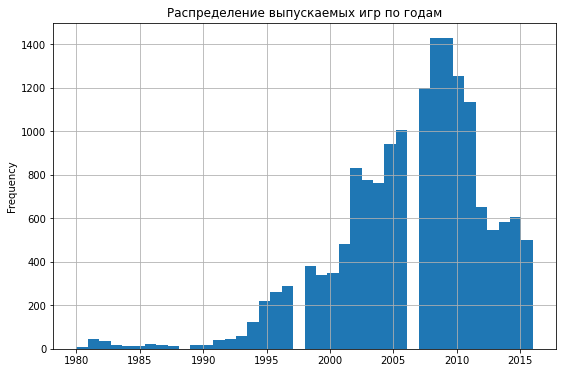

In [21]:
data['year_of_release'].plot(
    kind='hist',
    bins=40,
    grid=True,
    figsize=(9,6),
    title='Распределение выпускаемых игр по годам');

Заметно, что после 1995 года начался бурный рост количества выппускаемых игр, то есть распределение смещено вправо.  
Так как нам нужно спрогнозировать показатели в 2017 году, то я предполагаю, что показатели 1980-1995 годов можно не учитывать.

Попробуем оценить популярность платформ по общему количеству проданных на ней игр за всё время.

In [22]:
# построим сводную таблицу 
sales_by_platforms =data.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
# переименуем колонки
sales_by_platforms.columns = ['total_sales']
# посмотрим на результат
sales_by_platforms.sort_values(('total_sales'), ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видно, что первые 6 платформ значительно отрываются по продажам от всех остальных, в частности, разрыв между 6 и 7 местом двухкратный. Однако важно понимать, что первые 6 плаформ уже "мертвы", для них уже несколько лет до 2017 не издаются и не продаются игры.  
Получается, что нужно понимание о времени жизни платформ, какие платформы актуальны и популярны.

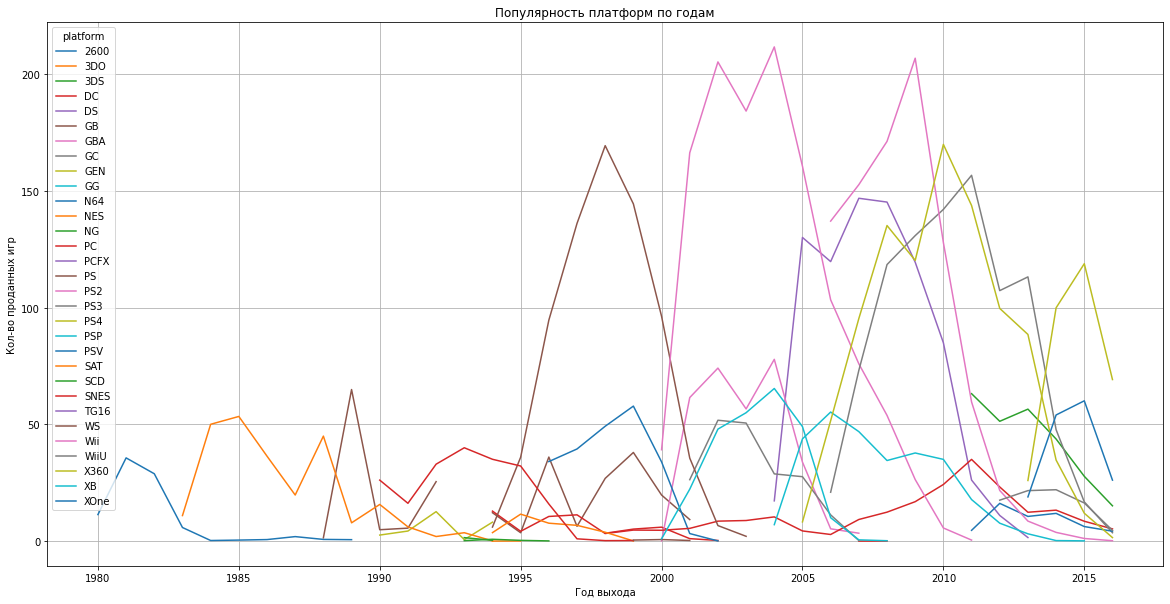

In [23]:
# сделаем сводную таблицу и визуализируем её в виде графика
data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='year_of_release',
    ascending=True
).plot(
    grid=True,
    figsize=(20,10),
    xlabel='Год выхода',
    ylabel='Кол-во проданных игр',
    title='Популярность платформ по годам'
);

По графикам видно, что цикл жизни популярных платформ составляет около 8-10 лет, тогда для предсказаний показателей на 2017 год лучше всего подходит интервал для анализа за 2006-2016 года.  
Согласно полученным рекомендациям: игровая индустрия - динамичная отрасль, лучше использовать данные за 2-3 года до необходиомго. В 2016 неполные данные, значит берём данные за 2013-2016 года.
Перестроим график выше под указанный диапазон.

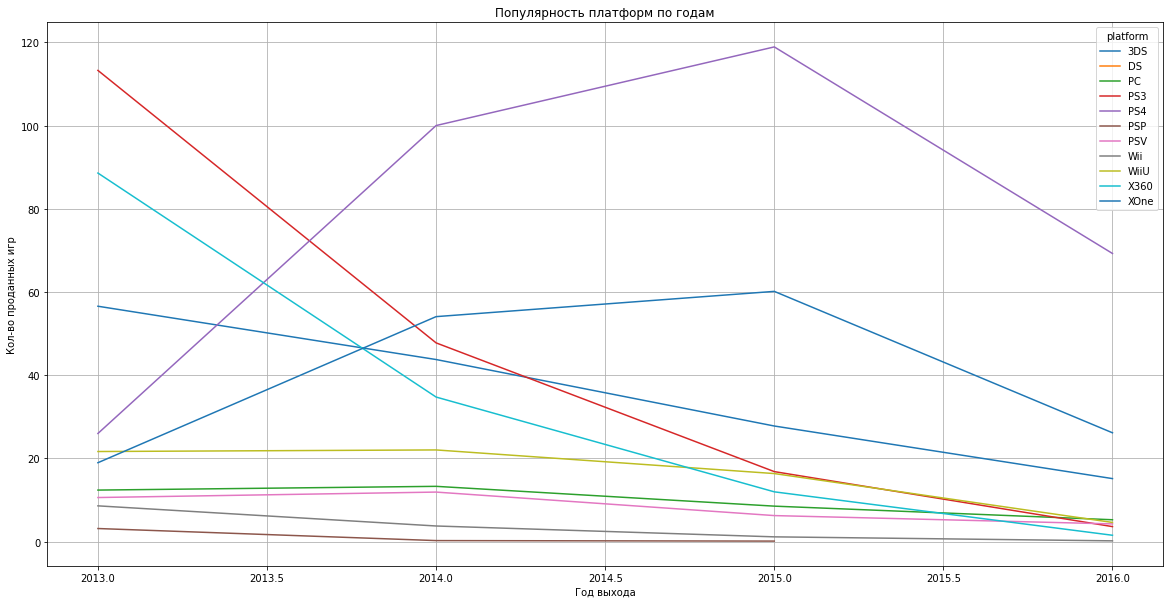

In [24]:
data.query('year_of_release >= 2013').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='year_of_release',
    ascending=True
).plot(
    grid=True,
    figsize=(20,10),
    xlabel='Год выхода',
    ylabel='Кол-во проданных игр',
    title='Популярность платформ по годам'
);

Видно, что:  
* PS3, X360 отживают свой век, а PS4 и XOne на пике популярности.
* PC показывает стабильный уровень продаж игр.
* PSP сменилась PSV, одновременно появилась 3DS, но это всё мобильные платформы, для них ведётся отдельная разработка нишевых проектов. 
* Wii/WiiU также можно отнести к очень нишевым платформам, не имеющих широкого признания в мире.

Нужно выделить отдельный датафрейм, содержащий только актуальные данные.

In [25]:
actual_df = data.query('year_of_release >= 2013')
# сразу посмотрим, инф-ю о нём
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


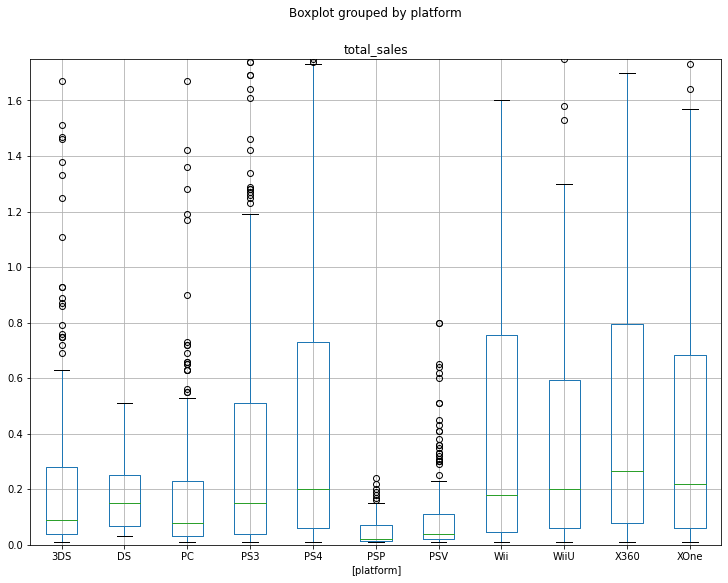

In [26]:
# строим график boxplot по глобальным продажам игр в разбивке по платформам
actual_df.boxplot(column=['total_sales'], by=['platform'], figsize=(12,9))
plt.ylim([0, 1.75])
plt.show()

#### Выводы:  
* Самые популярные платформы: PS3 & X360;
* Перспетивные платформы: PS4 & XOne;
* Платформы Wii & WiiU занимаются нишевыми продуктами.

### Исследование влияния отзывов

Для исследования влияния отзывов важно, чтобы это была популярная платформа, так как в 2016 году имеются пропуски в данных, то лучше выбрать платформу, которую это не касается.  
Я фанат PS, поэтому выбираю PS3 для дальнейшего анализа.

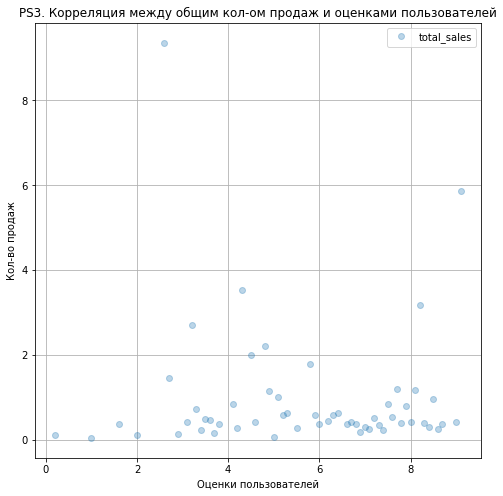

Корреляция продаж и оценок пользователей: 

             total_sales  user_score
total_sales     1.000000    0.002394
user_score      0.002394    1.000000 



In [27]:
# проверяем корреляцию продаж и отзывов пользователей
#ps3_df = actual_df.query('platform == "PS3"')
actual_df.query('platform == "PS3"').pivot_table(
    index='user_score', 
    values='total_sales'
).plot(
    grid=True, 
    style='o', 
    figsize=(8, 8), 
    alpha=0.3,
    title='PS3. Корреляция между общим кол-ом продаж и оценками пользователей',
    xlabel='Оценки пользователей',
    ylabel='Кол-во продаж'
)
plt.show()
print('Корреляция продаж и оценок пользователей:','\n')
print(actual_df.query('platform == "PS3"').pivot_table(index='name', values=['user_score', 'total_sales']).corr(),'\n')

Как видно выше, имеется очень слабая прямая корреляция.

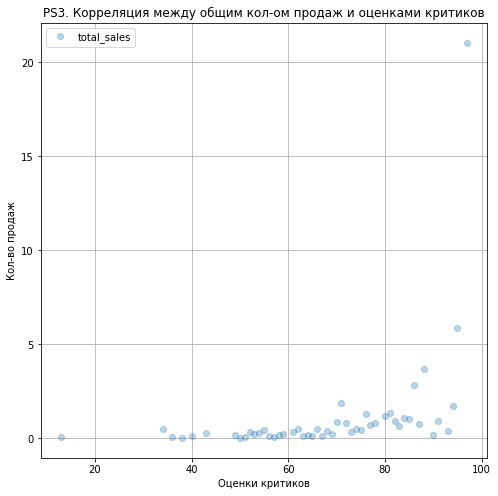

Корреляция продаж и оценок критиков: 

              critic_score  total_sales
critic_score      1.000000     0.334285
total_sales       0.334285     1.000000 



In [28]:
# проверяем корреляцию продаж и отзывов критиков
actual_df.query('platform == "PS3"').pivot_table(
    index='critic_score', 
    values='total_sales'
).plot(
    grid=True, 
    style='o', 
    figsize=(8, 8), 
    alpha=0.3,
    title='PS3. Корреляция между общим кол-ом продаж и оценками критиков',
    xlabel='Оценки критиков',
    ylabel='Кол-во продаж'
)
plt.show()
print('Корреляция продаж и оценок критиков:','\n')
print(actual_df.query('platform == "PS3"').pivot_table(index='name', values=['critic_score', 'total_sales']).corr(),'\n')

 Имеется слабая прямая корреляция, больше, чем у отзывов пользователей, но недостаточная, чтобы одназначно утверждать.  
 Необходимо проверить для других популярных платформ: X360, PS4, XOne.

In [29]:
print('X360. Корреляция продаж и оценок пользователей:','\n')
print(actual_df.query('platform == "X360"').pivot_table(index='name', values=['user_score', 'total_sales']).corr(),'\n')
print('X360. Корреляция продаж и оценок критиков:','\n')
print(actual_df.query('platform == "X360"').pivot_table(index='name', values=['critic_score', 'total_sales']).corr(),'\n')
print('PS4. Корреляция продаж и оценок пользователей:','\n')
print(actual_df.query('platform == "PS4"').pivot_table(index='name', values=['user_score', 'total_sales']).corr(),'\n')
print('PS4. Корреляция продаж и оценок критиков:','\n')
print(actual_df.query('platform == "PS4"').pivot_table(index='name', values=['critic_score', 'total_sales']).corr(),'\n')
print('XOne. Корреляция продаж и оценок пользователей:','\n')
print(actual_df.query('platform == "XOne"').pivot_table(index='name', values=['user_score', 'total_sales']).corr(),'\n')
print('XOne. Корреляция продаж и оценок критиков:','\n')
print(actual_df.query('platform == "XOne"').pivot_table(index='name', values=['critic_score', 'total_sales']).corr(),'\n')

X360. Корреляция продаж и оценок пользователей: 

             total_sales  user_score
total_sales     1.000000   -0.011742
user_score     -0.011742    1.000000 

X360. Корреляция продаж и оценок критиков: 

              critic_score  total_sales
critic_score      1.000000     0.350345
total_sales       0.350345     1.000000 

PS4. Корреляция продаж и оценок пользователей: 

             total_sales  user_score
total_sales     1.000000   -0.031957
user_score     -0.031957    1.000000 

PS4. Корреляция продаж и оценок критиков: 

              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000 

XOne. Корреляция продаж и оценок пользователей: 

             total_sales  user_score
total_sales     1.000000   -0.068925
user_score     -0.068925    1.000000 

XOne. Корреляция продаж и оценок критиков: 

              critic_score  total_sales
critic_score      1.000000     0.416998
total_sales       0.416998     1.000000 



#### Вывод:
Для всех основных платформ наблюдается одинаковая ситуация: пользовательские отзывы не оказывают никакого влияния на кол-во продажи, а положительные отзывы критиков, возможно, немного увеличивают продажи, но не удалось найти данных доказывающих сильную корреляцию.

### Исследование влияния жанра

In [30]:
# построим сводную таблицу 
sales_by_platforms =data.pivot_table(
                                 index = ['genre'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
# переименуем колонки
sales_by_platforms.columns = ['total_sales']
# посмотрим на топ результат
sales_by_platforms.sort_values(('total_sales'), ascending=False)

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


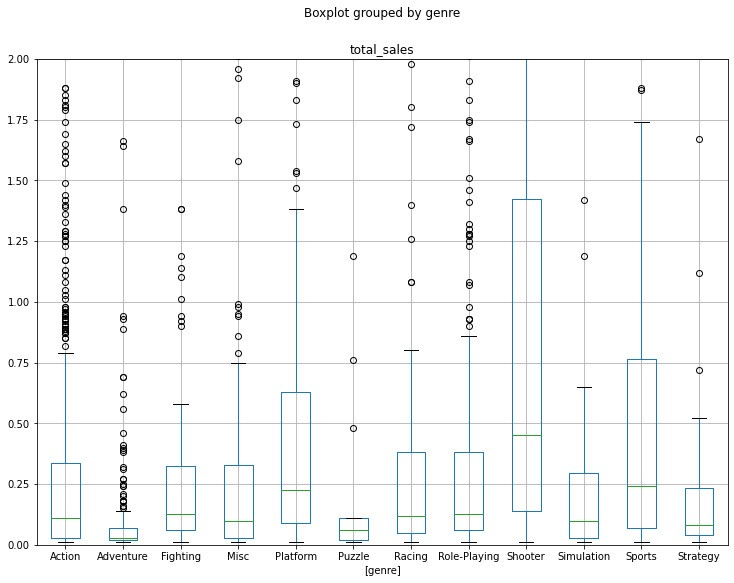

In [31]:
# строим график boxplot по глобальным продажам игр в разбивке по жанрам
actual_df.boxplot(column=['total_sales'], by=['genre'], figsize=(12,9))
plt.ylim([0, 2])
plt.show()

#### Выводы:  
На графике видно, что у жанра Action много выбросов, то есть проектов, заработавших большие деньги, но третий квартиль у него лежит ниже, чем у многих других.  
Самое высоко медианное значение у жанра Shooter, затем идут Platform и Sports соответственно. 


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Именно так. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого и стоит рассматривать средние или медианные продажи. По медианным продажам ты верно увидел, что лидирует Shooter</div>

### Исследование портрета пользователя по регионам

Из имеющихся данных в датасете, пригодными для формирования пользователя являются: платформа, жанр и рейтинг.
На основании указанных признаков и будем составлять портрет для каждого региона.

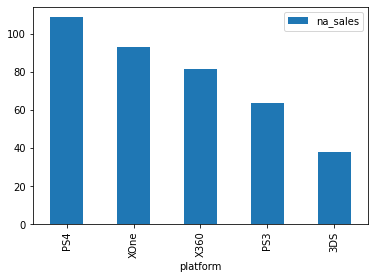

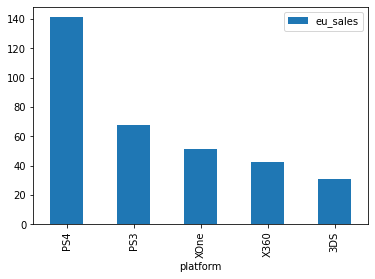

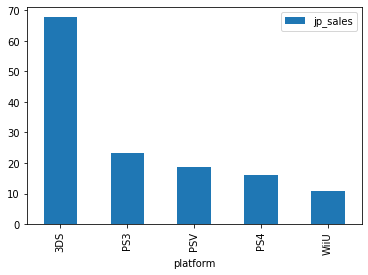

In [32]:
# группируем платформы по регионам и выводим топ 5 по продажам
main_reg_sales = ['na_sales', 'eu_sales', 'jp_sales']
for reg in main_reg_sales:
    actual_df.groupby(by='platform').agg({reg:'sum'}).sort_values(by=reg, ascending=False).head(5).plot(kind='bar')
plt.show()

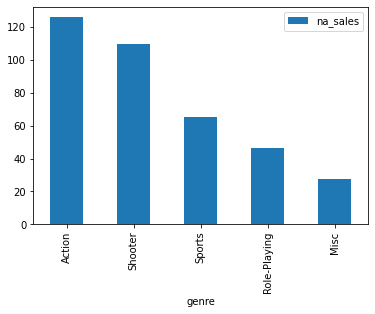

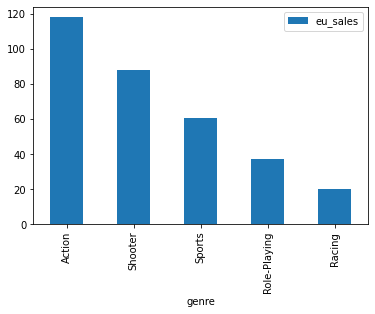

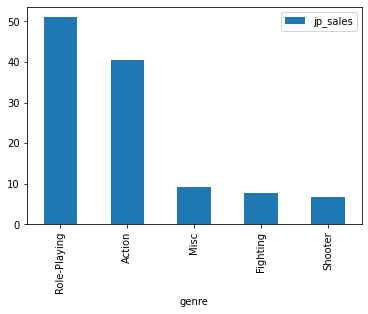

In [33]:
# группируем жанры по регионам и выводим топ 5 по продажам
main_reg_sales = ['na_sales', 'eu_sales', 'jp_sales']
for reg in main_reg_sales:
    actual_df.groupby(by='genre').agg({reg:'sum'}).sort_values(by=reg, ascending=False).head(5).plot(kind='bar')
plt.show()

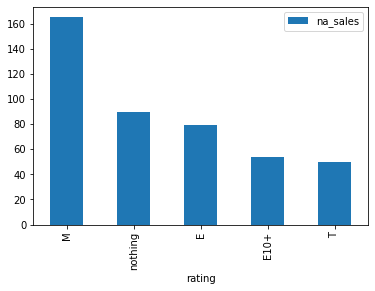

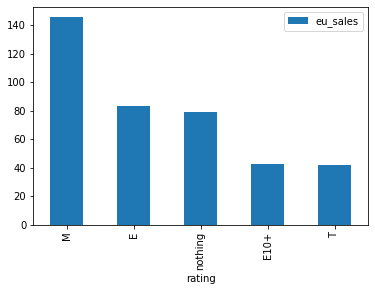

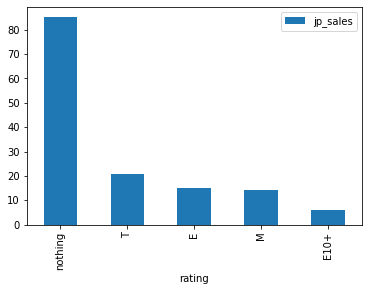

In [34]:
# группируем рейтинг по регионам и выводим топ 5 по продажам
main_reg_sales = ['na_sales', 'eu_sales', 'jp_sales']
for reg in main_reg_sales:
    actual_df.groupby(by='rating').agg({reg:'sum'}).sort_values(by=reg, ascending=False).head(5).plot(kind='bar')
plt.show()

#### Выводы:  
  1) Для пользователя Северной Америки свойственно дома иметь PS4, на втором месте XBox One играть в Action-игры с рейтингом M, подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.  
  2) Пользователь из Евросоюза предпочитает PS4, играет в Action-игры с рейтингом M.  
  3) Люборытно, что между пользователями из СА и ЕС разница состоит в запасной в платформе: у СА на втором месте XBox One, у ЕС - PS3.    
  4) Японский пользователь предпочитает платформы от Nintendo (DS & 3DS), играет в игры жанра Role-Playing. По рейтингу информации нет, возможно, потому что деятельность организации Entertainment Software Rating Board (ESRB) не распространяется на Японию. В целом, японские пользователи знамениты своей поддержкой внутреннего рынка, там могут выходить игры, не получающие международного рейтинга и не представленные в остальном мире.

### Проверка гипотез

#### Гипотеза 1  

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Необходимо сформулировать нулевую и анльтернативную гипотезы, например:

    Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
    H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Так как наши выборки независимы между собой будем использовать t-критерий Стьюдента

In [35]:
# сразу определяемся с показателем критичности, alpha
alpha = 0.05

# для упрощения записи вынесем данные с оценками по каждой платформе в отдельную переменную
xone_score = actual_df[(actual_df['platform'] == 'XOne') & (actual_df['user_score'] > 0)]['user_score']
pc_score = actual_df[(actual_df['platform'] == 'PC') & (actual_df['user_score'] > 0)]['user_score']

# тест Стьюдента
results = st.ttest_ind(xone_score, pc_score)

# оцениваем результат
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


##### Вывод:  
отсуствует статистически значимая разница между средним пользовательским рейтингом у Xbox One & PC.

#### Гипотеза 2  

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Необходимо сформулировать нулевую и анльтернативную гипотезы, например:
    
    H0: Средние пользовательские рейтинги жанров Action и Sports равны
    H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Вновь применяем t-критерий Стьюдента

In [36]:
# сразу определяемся с показателем критичности, alpha
alpha = 0.05

# для упрощения записи вынесем данные с оценками по каждой платформе в отдельную переменную
action_score = actual_df[(actual_df['genre'] == 'Action') & (actual_df['user_score'] > 0)]['user_score']
sports_score = actual_df[(actual_df['genre'] == 'Sports') & (actual_df['user_score'] > 0)]['user_score']

# тест Стьюдента
results = st.ttest_ind(action_score, sports_score)

# оцениваем результат
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


##### Вывод:  
присуствует статистически значимая разница между средним пользовательским рейтингом у игр жанров Action & Sports.

## Общий вывод  

История видеоигр в доступной нам статистике берёт начало с 1980 года, однако настоящий её рассвет пришёлся нв 1995 год, когда технологический рост и развитие сферы позволили создавать продукцию, рассчитанную на более широкую аудиторию, а не только энтузиастов.  
При анализе данных выяснилось, что не одно поколение платформ успело сменить друг друга. В среднем срок жизни популярных платформ составляет 8-10 лет. Черезвычайно популярными платформами можно считать: PS2, X360, PS3, Wii ,DS, PS.  
На текущий момент (2017 год) практически все популярные платформы имеют актуального приемника: PS4, XBox One, 3DS, WiiU.
Если не считать 3DS & WiiU от Nintendo, выпускающей очень нишевые продукты, то наиболее перспективными платформами можно считать PS4 & XBox One.  Отдельно бы хотелось подчеркнуть, что PC как платформа всегда показывала стабильный уровень продаж, без взлётов и падений.  
С учетом новой информации, что в игровой индустрии следует ориентороваться на данные последних 2-3 лет, был проведён дальнейший анализ и сдланы выводы.  
Говоря о перспективности выпуске игры, стоит обязательно учесть в каком регионе её планируется продавать, ведь будущие продажи напрямую зависят от среднего портрета пользователя в регионе, например:  
  1) Для пользователя Северной Америки свойственно дома иметь PS4, играть в Action-игры с рейтингом M, то есть для лиц старше 17 лет.  
  2) Пользователь из Евросоюза предпочитает PS4, играет в Action-игры с рейтингом M.  
  3) Люборытно, что между пользователями из СА и ЕС разница состоит в основном в "запасной" платформе: вторая по поулярности в СА - это XBox One, в ЕС - PS3.  
  4) Японский пользователь предпочитает платформы от Nintendo (DS & 3DS), играет в игры жанра Role-Playing. По рейтингу информации нет, возможно, потому что деятельность организации Entertainment Software Rating Board (ESRB) не распространяется на Японию. В целом, японские пользователи знамениты своей поддержкой внутреннего рынка, там могут выходить игры, не получающие международного рейтинга и не представленные в остальном мире.  
    
С учёт учётом всего сказанного выше, делаем вывод, что для 2017 наиболее перспективным будет выпуск игры на платформе PS4 для ЕС в жанре Action, Sports или Shooter, аналогично для СА, только платформа XBox One. С Японией всё сложнее.  
Были проверены несколько гипотез:  
  * Выяснили, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимое различие.
  * Подтвердили, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.